In [27]:
%load_ext autoreload
%autoreload 2

# Imports
import pandas as pd

from scenario import LoanScenario

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# Initial variables

# Constant
vars = ["L", "B"] # Variables to plot the output for

R = 2.56 # Yearly interest Rate (R) (in %)
# Set start year and end year
start_year = 2024
end_year = 2050

BC = -500 # Monthly Balance Change (BC) (Income-Expenses)

# Scenario 1
L0 = 10_000 # Start Loan (L) amount
B0 = 5_000 # Start (combined) Balance (B) (overall balance on on your bank accounts)
LC = 100 # Change of the loan in this period: how much you are adding/repaying per month

s1 = LoanScenario(L0=L0, B0=B0, LC=LC, R=R, BC=BC, start_year=start_year, end_year=end_year)


# Scenario 2
L0 = 6_000 # Start Loan (L) amount
B0 = 1_000 # Start (combined) Balance (B) (overall balance on on your bank accounts)
LC = 0 # Change of the loan in this period: how much you are adding/repaying per month


s2 = LoanScenario(L0=L0, B0=B0, LC=LC, R=R, BC=BC, start_year=start_year, end_year=end_year)

scenarios = {"s1": s1,"s2": s2}

In [29]:
# Simulate
for s in scenarios.values():
    s.calculate()

# Combine the scenarios into 1 dataframe
results = {v: pd.DataFrame() for v in vars}

for s_name ,s in scenarios.items():
    prefix = s_name

    for v in vars:
        results[v]["Date"] = s.df["Date"]
        results[v][f"{prefix}_{v}"] = s.df[v]

for v in vars:
    results[v].set_index("Date", inplace=True)

# Show dataframe
results["L"].head()

,s1_L,s2_L
Date,,
2024-01-01,10000.000000,6000.000000
2024-02-01,10121.691930,6012.886295
2024-03-01,10242.227457,6024.966270
2024-04-01,10364.439622,6037.906186
2024-05-01,10486.188524,6050.455145


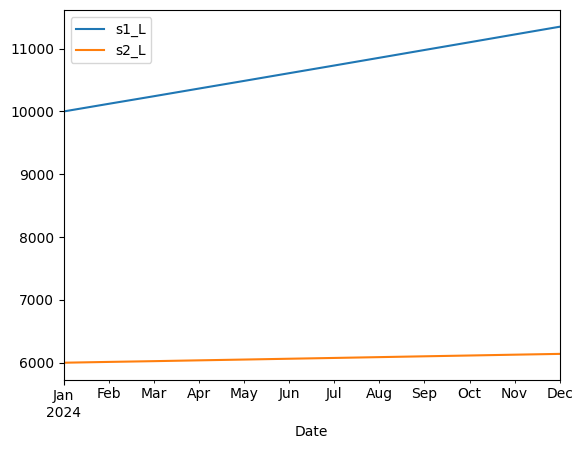

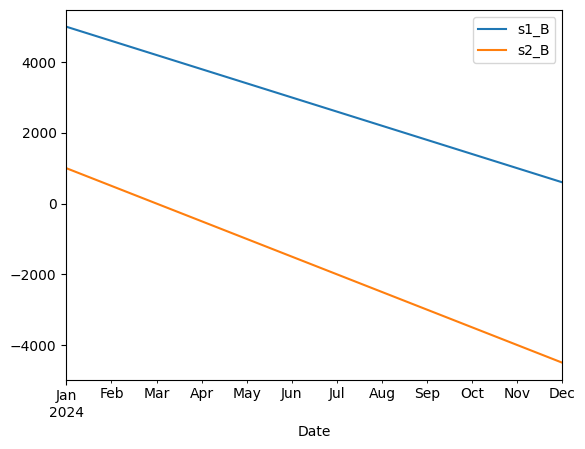

In [30]:
# Show output
for v in vars:
    results[v].plot.line()

In [31]:
# Draft:
# An idea for making R, PS, and E much more flexible:
# (Here, PS is: Payment schedule (+ is money you get, added to the loan. - is money you pay, repaying the loan.))

# import pandas as pd

# # Sample DataFrame
# data = {'date': ['2023-01-01', '2023-02-01', '2023-03-01'],
#         'LC': [0, 0, 0]}

# df = pd.DataFrame(data)
# df['date'] = pd.to_datetime(df['date'])

# # Sample dictionary
# year_values = {2023: 10, 2024: 20}

# # Update 'LC' column based on matching dates
# for year, value in year_values.items():
#     mask = (df['date'].dt.year == year)
#     df.loc[mask, 'LC'] = value

# print(df)